# Demo - Testing Data Cleaning

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

#Read the .json file
orig_pums = pd.read_json('2021-pums.json')
orig_pums.head()

,0,1,2,3,4
0,PWGTP,WRK,SEX,SOCP,ST
1,208,0,1,119111,06
2,88,1,2,119151,06
3,55,2,1,119111,06
4,87,1,2,113121,06


In [2]:
### Cleaning code for PUMS dataset: Step 1

#Make copies of the dataframes
cleaned_pums = orig_pums.copy()
#Define the 0th row as the header
cleaned_pums.columns = cleaned_pums.iloc[0]
cleaned_pums = cleaned_pums.drop(cleaned_pums.index[0])
cleaned_pums = cleaned_pums.reset_index(drop=True)
#Keep the WRK, SEX, and SCOP variables
cleaned_pums = cleaned_pums[['WRK', 'SEX', 'SOCP']]
#Replace 0 values in WRK column with np.nan
cleaned_pums['WRK'] = cleaned_pums['WRK'].replace({'0': np.nan})

<AxesSubplot: ylabel='0'>

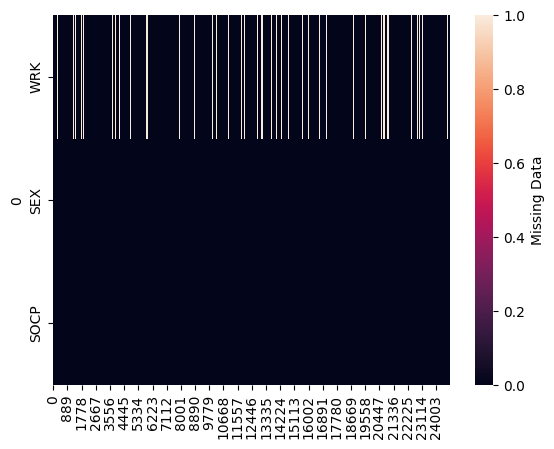

In [3]:
sns.heatmap(cleaned_pums.isna().transpose(),
            cbar_kws={'label': 'Missing Data'})

In [4]:
### Cleaning code for PUMS dataset: Step 2
#Drop NA values in PUMS dataset
cleaned_pums = cleaned_pums.dropna()

<AxesSubplot: ylabel='0'>

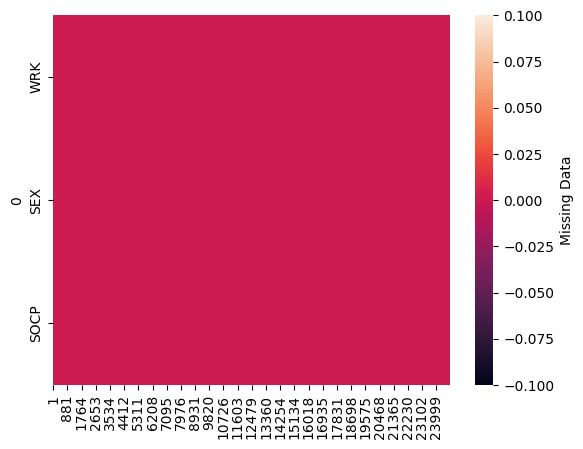

In [5]:
sns.heatmap(cleaned_pums.isna().transpose(),
            cbar_kws={'label': 'Missing Data'});

In [6]:
#Read in the excel file (note: will take a few minutes to load)
orig_wage_df = pd.read_excel('oes_research_2021_sec_55-56.xlsx')
#Show the first few rows
orig_wage_df.head()

,AREA,AREA_TITLE,NAICS,NAICS_TITLE,I_GROUP,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,55,Management of Companies and Enterprises,sector,00-0000,All Occupations,total,21920,0,...,35.6,56.94,79.49,35470,47040,74050,118440,165330,NaN,NaN
1,1,Alabama,55,Management of Companies and Enterprises,sector,11-0000,Management Occupations,major,4820,4.1,...,61.13,92.03,#,61600,94020,127140,191420,#,NaN,NaN
2,1,Alabama,55,Management of Companies and Enterprises,sector,11-1021,General and Operations Managers,detailed,1600,7,...,60.5,#,#,60010,78520,125850,#,#,NaN,NaN
3,1,Alabama,55,Management of Companies and Enterprises,sector,11-2021,Marketing Managers,detailed,140,13.6,...,61.13,99.23,#,65240,98680,127140,206410,#,NaN,NaN
4,1,Alabama,55,Management of Companies and Enterprises,sector,11-2022,Sales Managers,detailed,140,14.7,...,49.56,77.94,#,59390,79010,103080,162110,#,NaN,NaN


In [7]:
#Make copies of the dataframes
cleaned_wage = orig_wage_df.copy()
#Replace alphanumeric characters (missing values + outliers) with NANs
cleaned_wage['H_MEAN'] = cleaned_wage['H_MEAN'].replace({'*': np.nan})
cleaned_wage['H_MEAN'] = cleaned_wage['H_MEAN'].replace({'#': np.nan})
#Filtering the dataframe to specific data elements
cleaned_wage = cleaned_wage[['AREA_TITLE', 'OCC_CODE', 'OCC_TITLE', 'H_MEAN']]
#Filter to only contain values pertaining to California
cleaned_wage = cleaned_wage[cleaned_wage['AREA_TITLE'] == 'California']
#Drop NA Values
cleaned_wage = cleaned_wage.dropna()

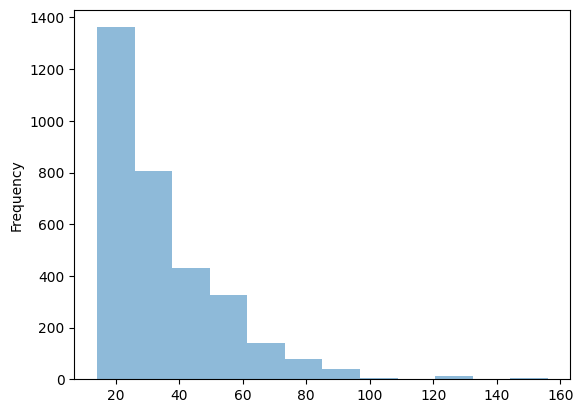

In [8]:
# Visually assess that the histogram values lie within an expected range
#(no unexpected values)
cleaned_wage['H_MEAN'].plot.hist(bins=12, alpha=0.5);

## Programmatic Asserts

In [9]:
print(cleaned_pums.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22353 entries, 1 to 24872
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   WRK     22353 non-null  object
 1   SEX     22353 non-null  object
 2   SOCP    22353 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB
None


In [11]:
#For PUMS dataset: Check that column data types are now accurate.
assert cleaned_pums.WRK.dtype == 'object'
assert cleaned_pums.SEX.dtype == 'object'
assert cleaned_pums.SOCP.dtype == 'object'

In [13]:
#For OEWS dataset: Check that the column data type is now accurate.
assert cleaned_wage.H_MEAN.dtype == 'float'

In [14]:
#For PUMS dataset: Check programmatically that number of NA values is 0
assert cleaned_pums.isnull().sum().sum() == 0

In [15]:
#For OEWS dataset: Check programmatically that number of NA values is 0
assert cleaned_wage.isnull().sum().sum() == 0

In [28]:
assert (cleaned_wage.H_MEAN <= 150).all()

AssertionError: 